## MSDI Data Preparation

In [1]:
import pandas as pd
import numpy as np
import tables
import h5py
import pickle

import math
import random

import os, sys, glob
from pathlib import Path

from keras import layers
from keras import Sequential
from keras.layers import Dense, Activation, Flatten
from keras.optimizers import Adam

import matplotlib.pyplot as plt

ImportError: ignored

In [ ]:
msdi_file = open("MSD-I_dataset.tsv", "r")
msdi_list = []


for lines in msdi_file:
    if lines[0] == 'T':
        fields = lines.strip('\n').split('\t')
        track_id = fields[0]
        genre = fields[1]
        #album_index= fields[2]
        set_type = fields[3]
        #parent_dir = 'data/' + track_id[2] + '/' + track_id[3] + '/' + track_id[4]
        #filepath = parent_dir + '/' + track_id + '.jpg'
        #msdi_db_map.append([filepath, genre])
        msdi_list.append([track_id, genre, set_type])

In [ ]:
msdi_df = pd.DataFrame(data=msdi_list, columns=['TrackId', 'Genre', 'SetType'])

In [ ]:
msdi_df

,TrackId,Genre,SetType
0,TRABKJU128F422A7FE,Metal,train
1,TRBLDQQ128F92E58B4,Rock,train
2,TRDMMDE128F14A9052,Rock,train
3,TRJOPZB128F4250E02,Rock,train
4,TRJKBVL128F935567B,Rock,train
...,...,...,...
30708,TRJRMVM128F4259C12,Punk,test
30709,TRJUGOK128F4243DA6,Pop,test
30710,TRTMWUS128F425D9AF,Pop,test
30711,TRSBAKM128F931C033,Rap,test


In [ ]:
mxm_file_train = open("mxm_dataset_train.txt", "r")
mxm_list_train = []


for lines in mxm_file_train:
    if lines[0] == 'T':
        fields = lines.strip('\n').split(',')
        track_id = fields[0]
        #mxm_track_id = fields[1]
        #sparse_wordvec = fields[2:]
        set_type = 'train'
        mxm_list_train.append([track_id, set_type])

In [ ]:
mxm_file_test = open("mxm_dataset_test.txt", "r")
mxm_list_test = []


for lines in mxm_file_test:
    if lines[0] == 'T':
        fields = lines.strip('\n').split(',')
        track_id = fields[0]
        #mxm_track_id = fields[1]
        #sparse_wordvec = fields[2:]
        set_type = 'test'
        mxm_list_test.append([track_id, set_type])

In [ ]:
mxm_list = mxm_list_train + mxm_list_test

In [ ]:
mxm_df = pd.DataFrame(data=mxm_list, columns=['TrackId', 'SetType'])

In [ ]:
mxm_df

,TrackId,SetType
0,TRAAAAV128F421A322,train
1,TRAAABD128F429CF47,train
2,TRAAAED128E0783FAB,train
3,TRAAAEF128F4273421,train
4,TRAAAEW128F42930C0,train
...,...,...
237657,TRZZXFY128F9342D0E,test
237658,TRZZXOQ128F932A083,test
237659,TRZZXVN128F93285B4,test
237660,TRZZYLF128F9316CAB,test


In [ ]:
msdi_mxm_df = msdi_df.set_index('TrackId').join(mxm_df.set_index('TrackId'), lsuffix='_msdi', rsuffix='_mxm', how='inner')

In [ ]:
msdi_mxm_df

,Genre,SetType_msdi,SetType_mxm
TrackId,,,
TRDMMDE128F14A9052,Rock,train,train
TRJOPZB128F4250E02,Rock,train,train
TRJKBVL128F935567B,Rock,train,train
TRUSOQD128F92CFEA5,Rock,train,train
TRKCEWE128F425BF56,Rock,train,train
...,...,...,...
TRJRMVM128F4259C12,Punk,test,test
TRJUGOK128F4243DA6,Pop,test,train
TRTMWUS128F425D9AF,Pop,test,train


In [ ]:
msdi_mxm_df

<AxesSubplot:xlabel='Genre', ylabel='count'>

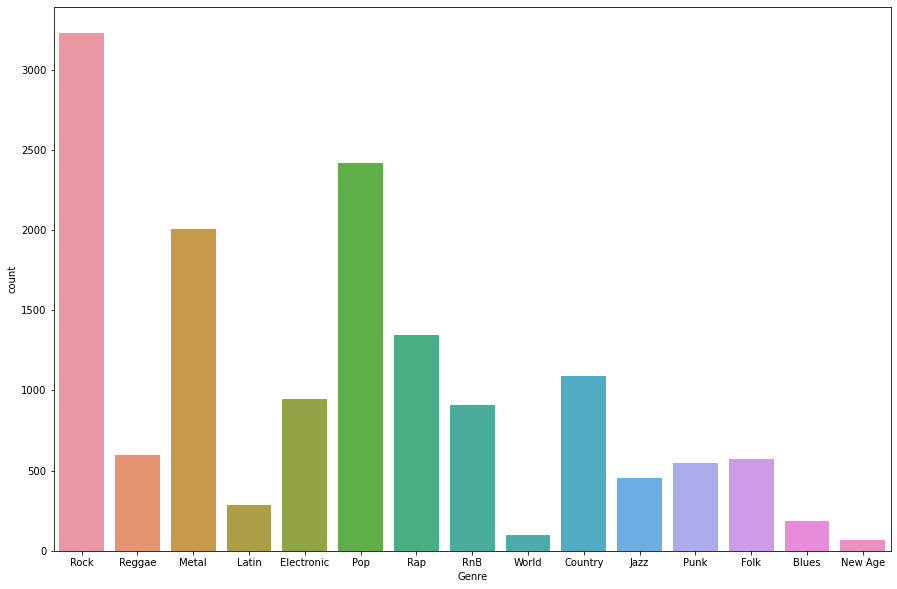

In [ ]:
import seaborn as sns

plt.figure(figsize=(15,10))
sns.countplot(x='Genre', data=msdi_mxm_df)

In [ ]:
var filtered_df

2048


In [ ]:
df = msdi_mxm_df.groupby('Genre').filter(lambda x: len(x) >= 700)

<AxesSubplot:xlabel='Genre', ylabel='count'>

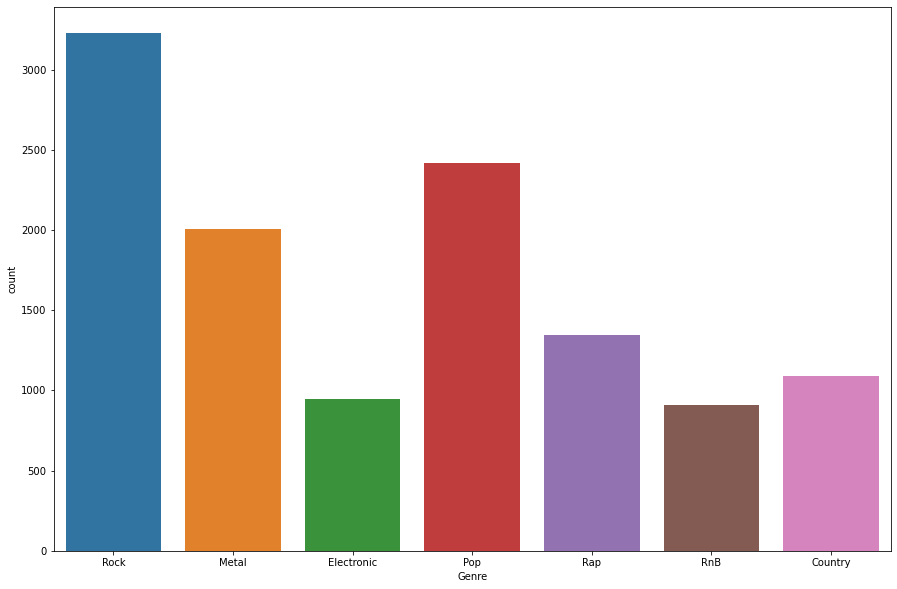

In [ ]:
plt.figure(figsize=(15,10))
sns.countplot(x='Genre', data=df)

In [ ]:
row_count = 700
filtered_dfs = []
for values in df.groupby('Genre').count().index.values:
    temp_df = msdi_mxm_df[msdi_mxm_df.Genre==values]
    filtered_dfs.append(temp_df.iloc[:row_count])
    
filtered_df = pd.concat(filtered_dfs)

In [ ]:
len(filtered_df)

4900

<AxesSubplot:xlabel='Genre', ylabel='count'>

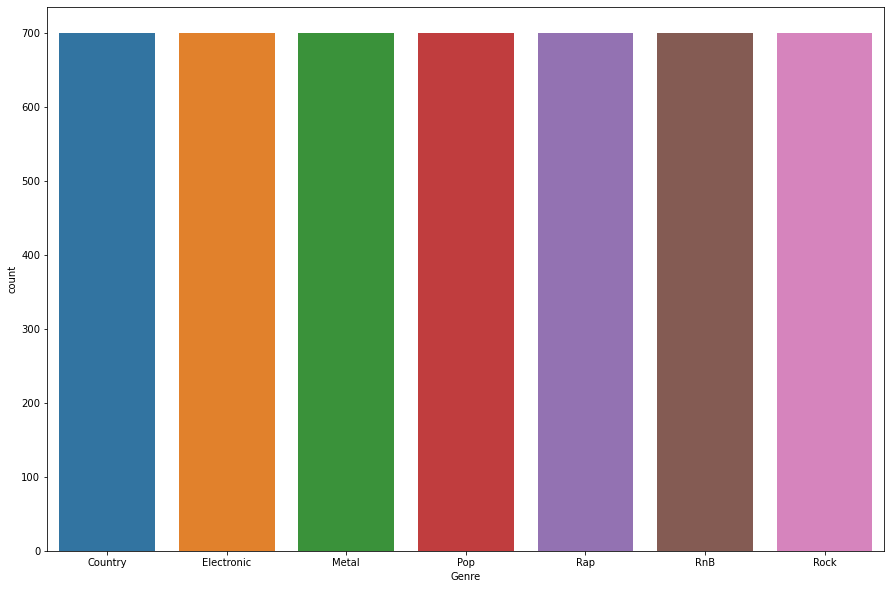

In [ ]:
plt.figure(figsize=(15,10))
sns.countplot(x='Genre', data=filtered_df)

In [ ]:
import pickle

#Defining a function to save the objects as a pickle file
def save_obj(obj, name ):
    with open(name + '.pkl', 'wb') as f:
        pickle.dump(obj, f, pickle.HIGHEST_PROTOCOL)

In [ ]:
filtered_df

,Genre,SetType_msdi,SetType_mxm
TrackId,,,
TREQVVI128F427C38E,Country,train,train
TRYCYSD128F148CF20,Country,train,train
TRLCZET12903D03F70,Country,train,train
TRJORPT128F42BAA8D,Country,train,train
TROBJYA128F42A2984,Country,train,train
...,...,...,...
TRQFZEO128E07930BC,Rock,train,test
TRNSWUN128F4247F87,Rock,train,train
TRLENOU128F4281E94,Rock,train,train


In [ ]:
shortlisted_tracks_df = filtered_df.drop(labels=['SetType_msdi', 'SetType_mxm'], axis=1)

In [ ]:
shortlisted_tracks_df

,Genre
TrackId,
TREQVVI128F427C38E,Country
TRYCYSD128F148CF20,Country
TRLCZET12903D03F70,Country
TRJORPT128F42BAA8D,Country
TROBJYA128F42A2984,Country
...,...
TRQFZEO128E07930BC,Rock
TRNSWUN128F4247F87,Rock
TRLENOU128F4281E94,Rock


In [ ]:
save_obj(shortlisted_tracks_df, 'shortlisted_tracks_df')

In [ ]:
shortlisted_tracks_df = None

In [ ]:
with open('shortlisted_tracks_df' +'.pkl', 'rb') as handle:
    shortlisted_tracks_df = pickle.load(handle)

In [ ]:
shortlisted_tracks_df

,Genre
TrackId,
TREQVVI128F427C38E,Country
TRYCYSD128F148CF20,Country
TRLCZET12903D03F70,Country
TRJORPT128F42BAA8D,Country
TROBJYA128F42A2984,Country
...,...
TRQFZEO128E07930BC,Rock
TRNSWUN128F4247F87,Rock
TRLENOU128F4281E94,Rock
